In [5]:
import pandas as pd
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import ShuffleSplit
import torch
from sklearn.utils import shuffle
import seaborn as sns

## Objective

The objective here is to preprocess our data and train, validation, test split for modeling. Train and Target Data are provided. 

Target data represents that data whose output is to be predicted.

**A brief description of the data**:

* TIMESTAMP: time stamps for the wind forecasts
* U10: zonal component of the wind forecast (West-East projection) at 10m above ground level
* V10: meridional component of the wind forecast (South-North projection) at 10m above ground level
* U100: zonal component of the wind forecast (West-East projection) at 100m above ground level
* V100: meridional component of the wind forecast (South-North projection) at 100m above ground level
* POWER: wind power generated by the wind farm (normalized)


## Loading Data

In [6]:
train_data=pd.read_csv('data/TrainData3.csv')
target_data=pd.read_csv('data/TargetData3.csv')

In [7]:
train_data.describe()

,POWER,U10,V10,U100,V100
count,26590.000000,27048.000000,27048.000000,27048.000000,27048.000000
mean,0.519677,2.286938,0.700514,3.124931,1.051055
std,0.313106,5.100936,4.481148,7.018101,6.150222
min,0.000000,-11.649200,-18.724500,-15.922300,-25.071400
25%,0.232298,-1.747315,-2.539780,-2.175257,-3.433463
50%,0.541332,2.788535,0.745344,3.923615,1.024665
75%,0.812216,6.047033,3.814062,8.239865,5.320432
max,1.000000,21.876300,18.122800,31.050900,25.117400


In [8]:
target_data.describe()

,U10,V10,U100,V100,POWER
count,672.000000,672.000000,672.000000,672.000000,672.000000
mean,-0.832462,1.582651,-0.842722,2.225325,0.442802
std,5.198260,5.239299,6.926143,6.920581,0.331655
min,-10.889100,-10.121500,-14.019700,-13.239300,0.000000
25%,-4.274402,-2.383808,-5.500485,-3.161033,0.121603
50%,-2.502135,1.338085,-3.149345,1.834255,0.404865
75%,2.168413,5.908492,3.214927,7.888323,0.735949
max,17.059900,14.892100,23.194500,20.116700,0.998474


### Preprocessing

In [10]:
train_data=train_data.dropna()
target_data=target_data.dropna()
train_data= train_data.reset_index(drop=True)

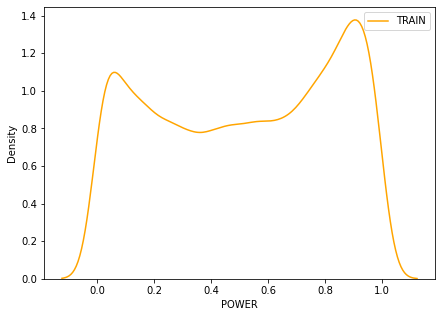

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
sns.kdeplot(train_data["POWER"],ax=ax,label='TRAIN',color="orange")
plt.legend()
plt.show()

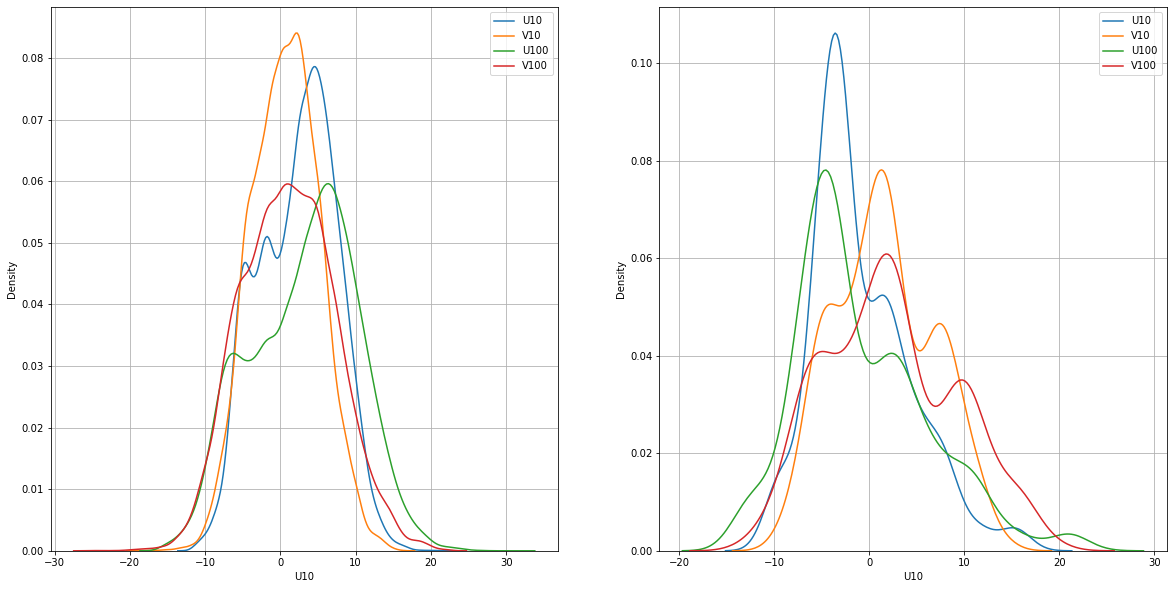

In [12]:
features=list(train_data.columns)
features.remove("POWER")
features.remove("TIMESTAMP")
fig, ax = plt.subplots(figsize=(20,10),nrows=1,ncols=2)
for col in features:
    sns.kdeplot(train_data[col],label=col,ax=ax[0])
    sns.kdeplot(target_data[col],label=col,ax=ax[1])
ax[0].grid(True)
ax[1].grid(True)
ax[1].legend()
ax[0].legend()
plt.legend()
plt.show()

## Train Dev Split

In [13]:
label_column="POWER"
columns=list(train_data.columns)
columns.remove(label_column)

**Given the different distribution between train and target set. We proceed as follow:**
* Validation and test sets need to have similar distributions, we split 70% of the target set equally between test and validation set.
* The remaining 30 of the target data is concatenated with the train set
* We shuffle the train set

In [14]:
#Split data between train and test set
rs=ShuffleSplit(n_splits=1, test_size=.3, random_state=42)
train_index, test_index =next(rs.split(train_data))

train_data, test_data = train_data.iloc[train_index], train_data.iloc[test_index] 



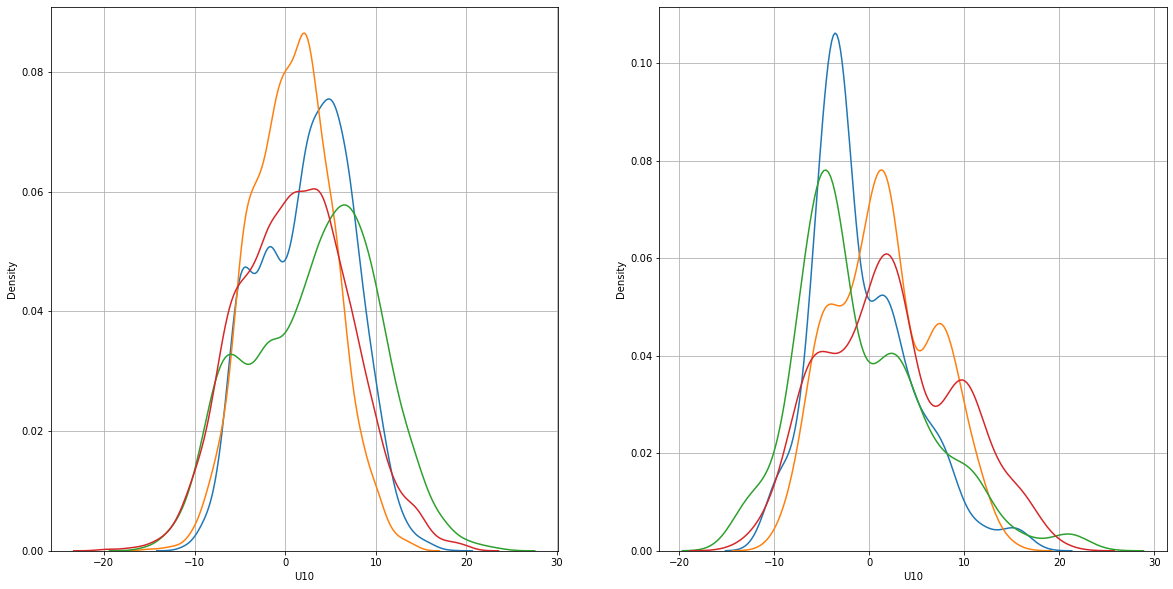

In [15]:
features=list(train_data.columns)
features.remove("POWER")
features.remove("TIMESTAMP")
fig, ax = plt.subplots(figsize=(20,10),nrows=1, ncols=2)
for col in features:
    sns.kdeplot(test_data[col],label=col,ax=ax[0])
    sns.kdeplot(target_data[col],label=col,ax=ax[1])
ax[0].grid(True)
ax[1].grid(True)
plt.show()

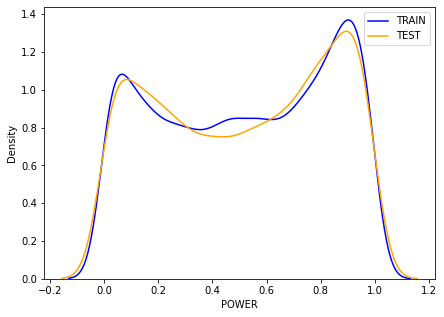

In [16]:
fig, ax = plt.subplots(figsize=(7,5))
sns.kdeplot(train_data["POWER"],ax=ax,label='TRAIN',color='blue')
sns.kdeplot(test_data["POWER"],ax=ax,label='TEST',color="orange")
plt.legend()
plt.show()

**It looks like the dev and test set have similar distributions !**

### Export data

In [17]:
train_data.to_csv("data/train_prep.csv",index=False)
test_data.to_csv("data/test_prep.csv",index=False)